In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [78]:
train = pd.read_csv(r'C:\Users\dell\Downloads\titanic_train.csv')
test = pd.read_csv(r'C:\Users\dell\Downloads\titanic_test.csv')

In [3]:
train.info()
test.info()
labels = train.Survived

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [4]:
print(labels)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

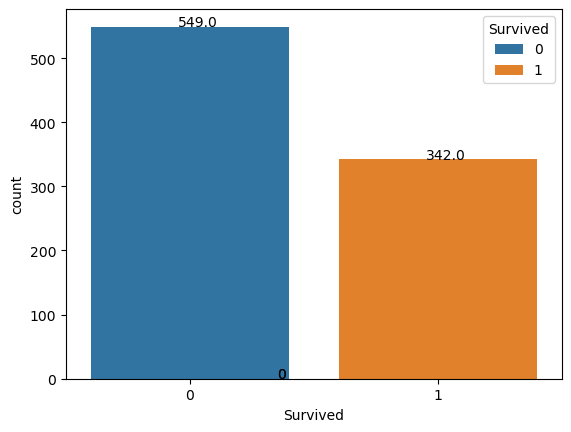

In [8]:
ax = sns.countplot(x='Survived', hue='Survived', data=train)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))

In [9]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar', stacked = True, figsize=(10,5))

<Axes: xlabel='Sex', ylabel='count'>

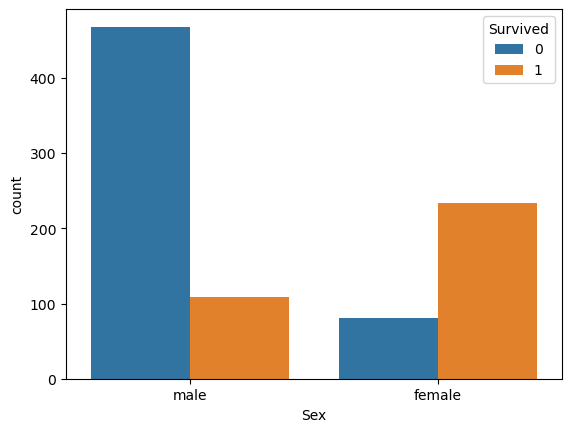

In [10]:
sns.countplot(x = 'Sex', hue = 'Survived', data=train)

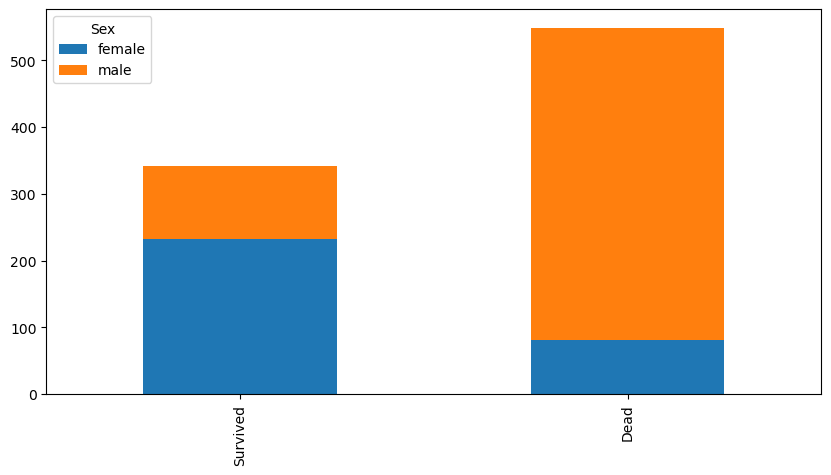

In [11]:
bar_chart('Sex')

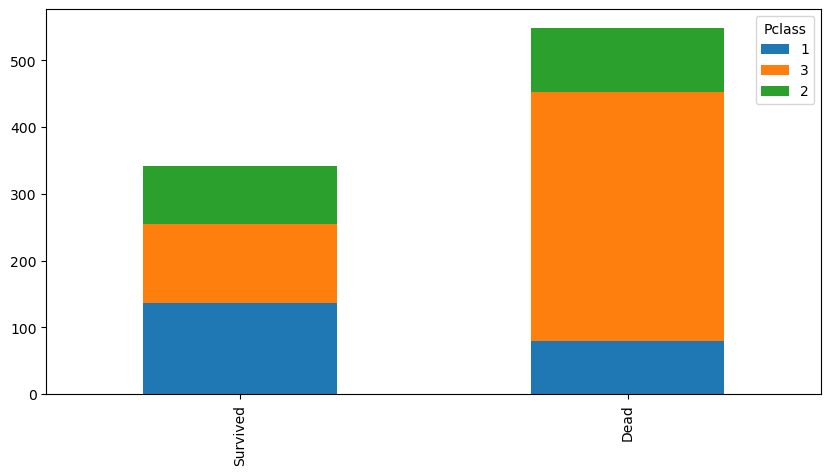

In [12]:
bar_chart('Pclass')

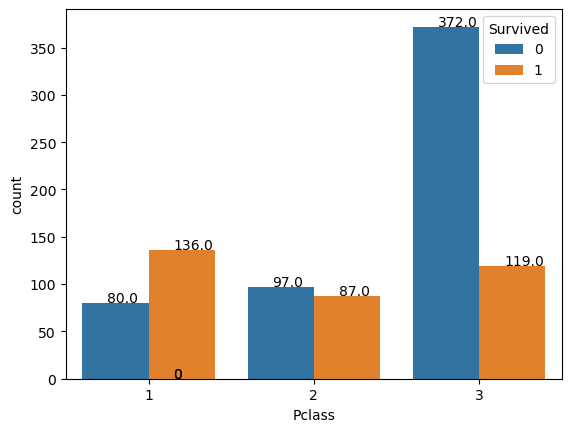

In [13]:
ax = sns.countplot(x='Pclass', hue='Survived', data=train)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [14]:
print('Survived 1st class', (372/(372+119)) * 100)
print('Survived 1st class', (97/(97+87)) * 100)
print('Survived 1st class', (80/(136+80)) * 100)

Survived 1st class 75.76374745417516
Survived 1st class 52.71739130434783
Survived 1st class 37.03703703703704


<Figure size 2000x500 with 0 Axes>

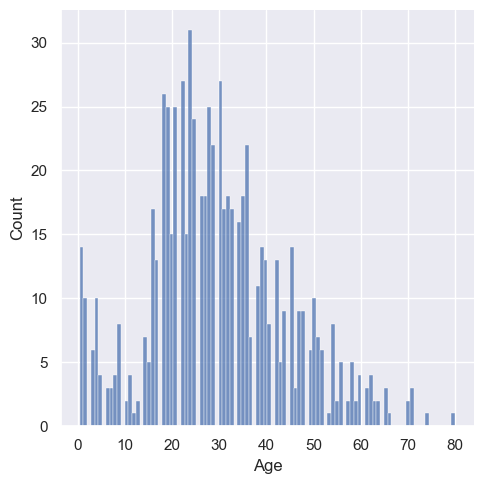

In [15]:
plt.figure(figsize=(20,5))
sns.set(style='darkgrid')
sns.displot(train['Age'], bins=100)

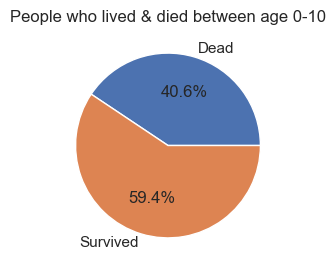

In [16]:
def age_pie(x,y,title):
    total = train.loc[(train.Age >= x) & (train.Age <= y)]['Survived'].count()
    survived = train.loc[(train.Age <= y) & (train.Age >= x) & (train.Survived) == 1]['Survived'].count()
    fig,ax = plt.subplots(figsize=(6,3), subplot_kw = dict(aspect="equal"))
    ax.pie(x=[total-survived,survived], labels=['Dead','Survived'],autopct='%1.1f%%')
    ax.set_title(title)
age_pie(0,10,'People who lived & died between age 0-10')

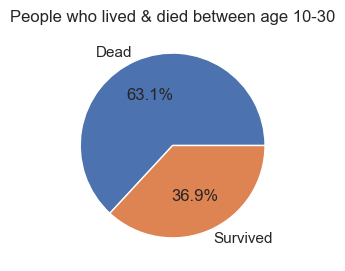

In [17]:
age_pie(10,30,'People who lived & died between age 10-30') #Keep playing with other inputs..

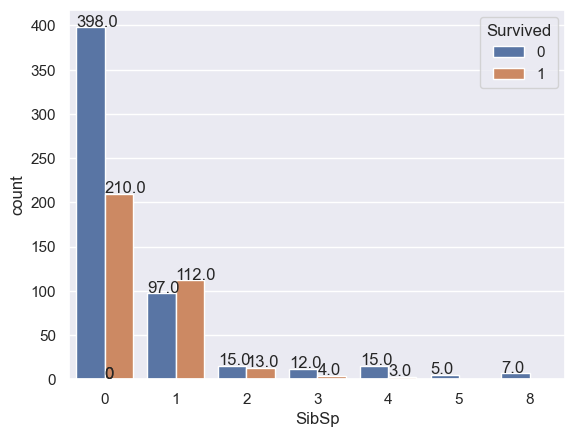

In [18]:
ax = sns.countplot(x='SibSp', hue='Survived', data=train) #Sibling or spouse
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+1))

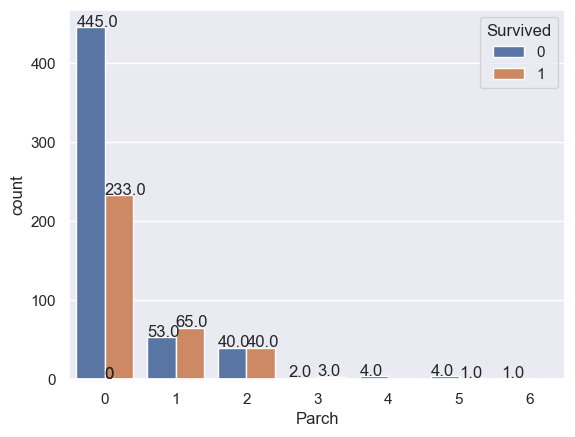

In [19]:
ax = sns.countplot(x='Parch', hue='Survived', data=train) #Parent or Children
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+1))

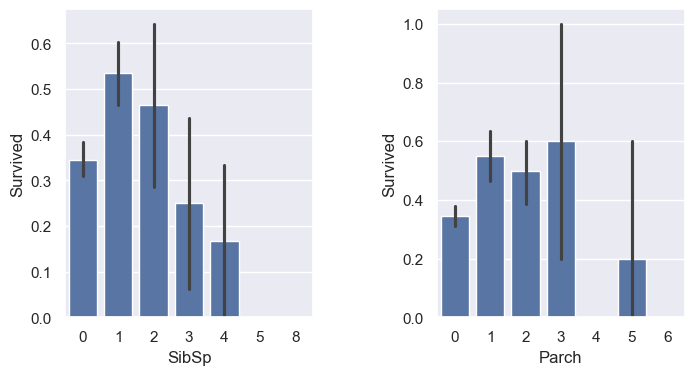

In [20]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.barplot(x="SibSp", y="Survived", data=train)
plt.subplot(122)
sns.barplot(x="Parch", y="Survived", data=train)
plt.subplots_adjust(wspace=0.5)

<Figure size 2000x500 with 0 Axes>

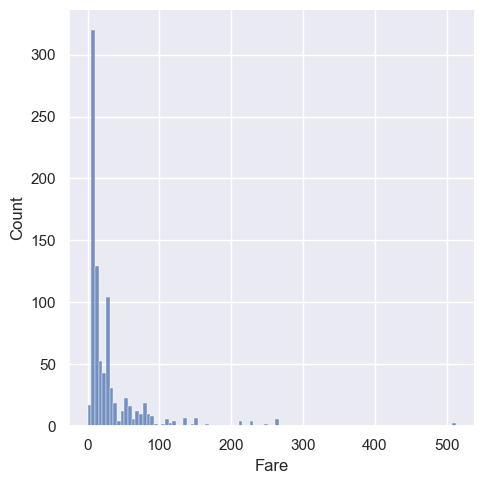

In [21]:
plt.figure(figsize=(20,5))
sns.set(style='darkgrid')
sns.displot(train['Fare'], bins=100)

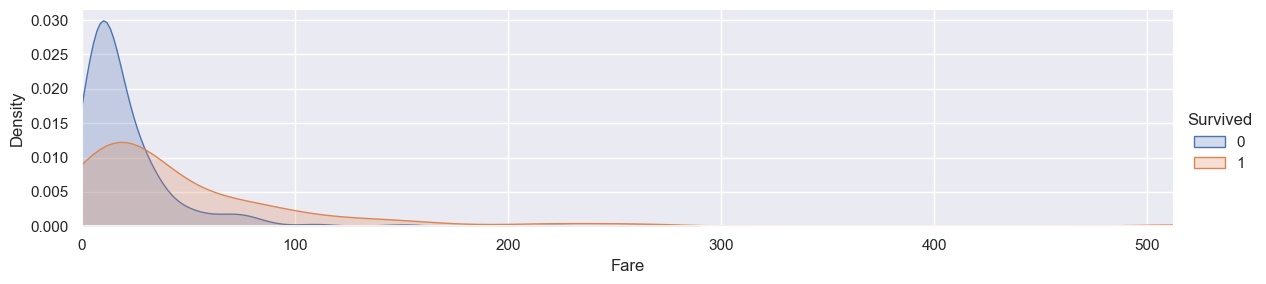

In [22]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

<Axes: >

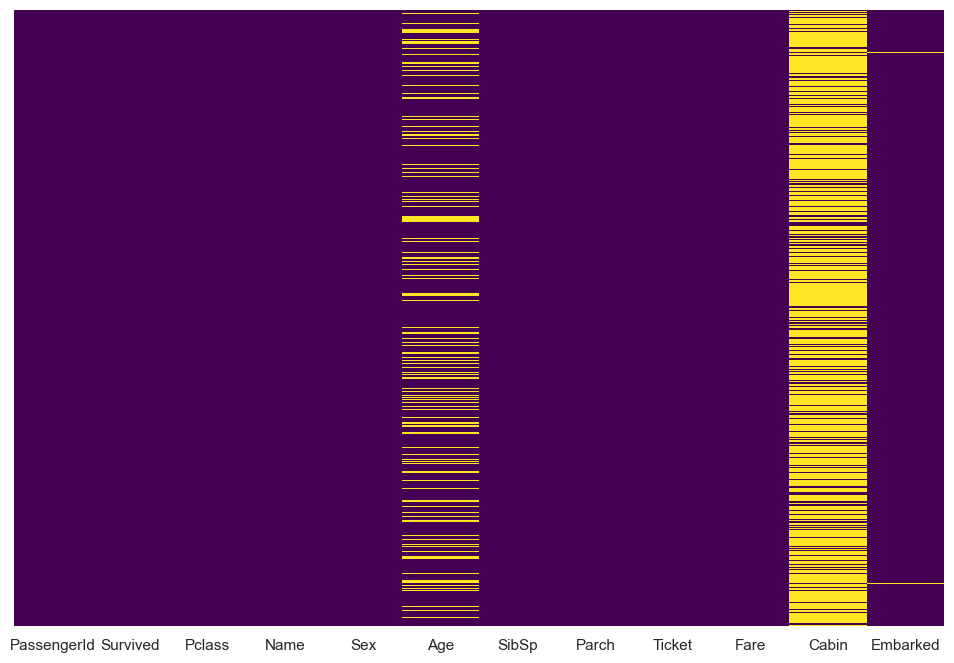

In [23]:
## Data Cleaning & Preprocessing
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),cbar=False,yticklabels=False, cmap='viridis')

In [24]:
train.Age.mean()

29.69911764705882

In [25]:
train.Age.isnull().sum()

177

In [26]:
train.groupby('Pclass').Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [27]:
### Handling missing values by replacing with Mean median and mode or random samples is what we can do here....

def inpute_age(col):
    Age = col[0]
    Pclass = col[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [28]:
train['Age'] = train[['Age','Pclass']].apply(inpute_age, axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_8608\1432720986.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = col[0]
C:\Users\dell\AppData\Local\Temp\ipykernel_8608\1432720986.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = col[1]


<Axes: >

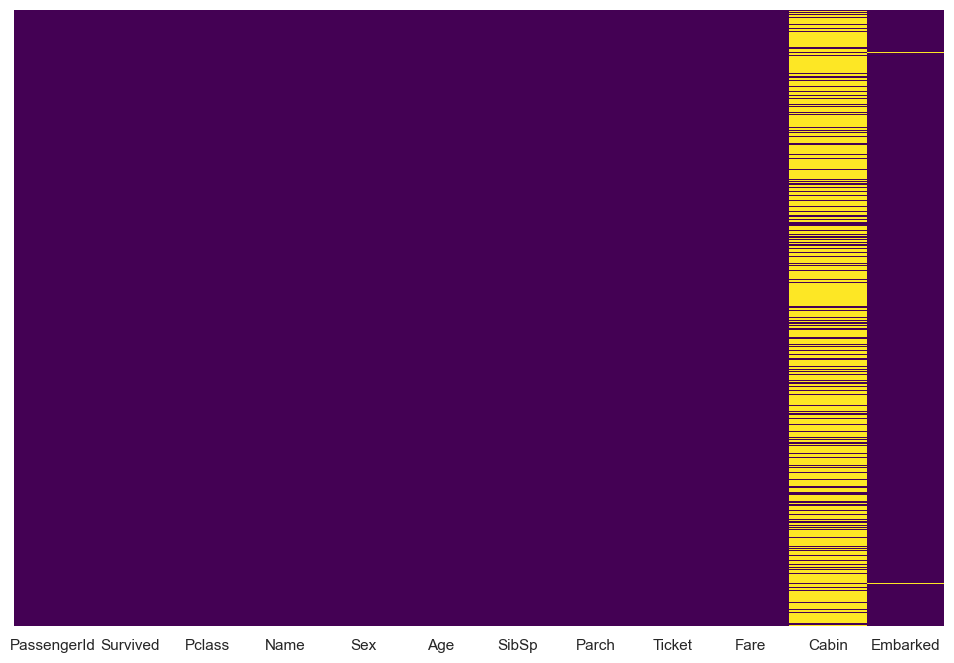

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [30]:
train.drop('Embarked', axis=1, inplace=True)

<Axes: >

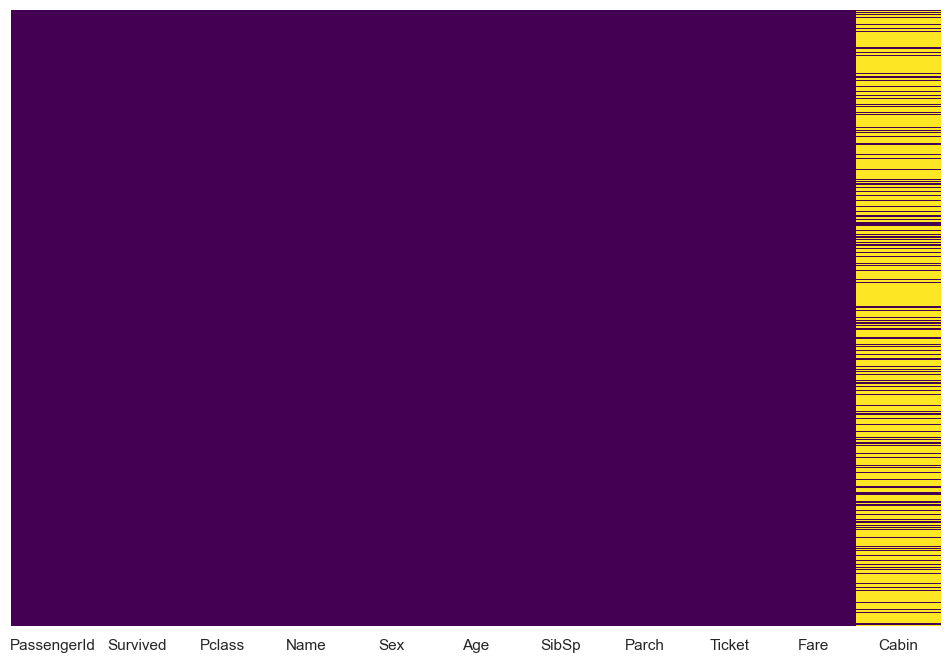

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [32]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [33]:
train.drop('Cabin', axis=1, inplace=True)

<Axes: >

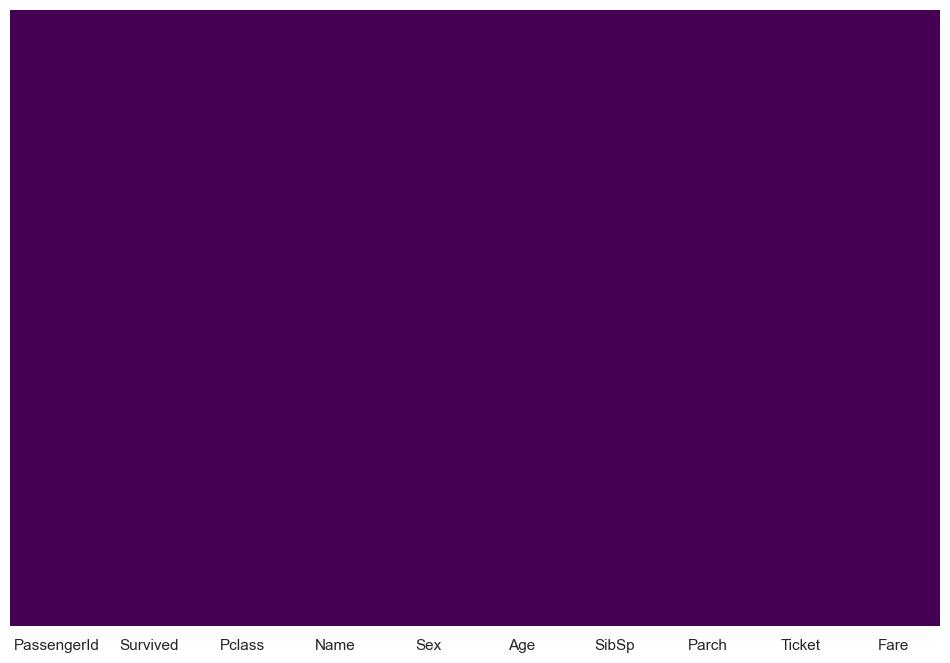

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [36]:
train['Male'] = pd.get_dummies(train['Sex'],drop_first=True)

In [37]:
train.drop(['PassengerId','Name','Sex','Ticket'], axis=1, inplace=True)

In [38]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Male      891 non-null    bool   
dtypes: bool(1), float64(2), int64(4)
memory usage: 42.8 KB


In [40]:
### Seperate feature columns from the target column
X = train.drop('Survived', axis=1)
y = train['Survived']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   Male    891 non-null    bool   
dtypes: bool(1), float64(2), int64(3)
memory usage: 35.8 KB


In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1, n_estimators=14)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=14, n_jobs=-1)

In [44]:
score = clf.score(x_test,y_test)
print("Accuracy", round(score,2)*100)

Accuracy 82.0


In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [47]:
score = clf.score(x_test,y_test)
print("Accuracy", round(score,2)*100)

Accuracy 80.0


In [79]:
test['Age'] = test[['Age','Pclass']].apply(inpute_age, axis=1)
test.drop('Cabin', axis=1, inplace=True)
test['Male'] = pd.get_dummies(test['Sex'], drop_first=True)
test.drop('Sex', axis=1, inplace=True)
test.drop(['PassengerId','Name','Ticket','Embarked'], axis=1, inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_8608\1432720986.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = col[0]
C:\Users\dell\AppData\Local\Temp\ipykernel_8608\1432720986.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = col[1]


In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    417 non-null    float64
 5   Male    418 non-null    bool   
dtypes: bool(1), float64(2), int64(3)
memory usage: 16.9 KB


In [82]:
test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
Male      0
dtype: int64

In [83]:
mean = test.Fare.mean()

In [84]:
test['Fare'] = test.Fare.fillna(mean)

In [85]:
test.Fare.isnull().sum()

0

In [87]:
y_predict = clf.predict(test)

In [88]:
test_df = pd.read_csv(r'C:\Users\dell\Downloads\titanic_test.csv')
p_ids = test_df['PassengerId']

In [90]:
submission = pd.DataFrame({
    "PassengerId": p_ids,
    "Survived": y_predict
})
submission.to_csv('titanic.csv', index=False)